In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
twitts_train = pd.read_csv("twitter_training.csv")

In [3]:
# Naming each column
column_name=['TweetID','Entity','Sentiment','Message']
twitts_train.columns=column_name
# Combining 2 dataframes to 1 dataframe
twitts=pd.concat([twitts_train],ignore_index=False)
twitts.head()

,TweetID,Entity,Sentiment,Message
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
twitts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetID    74681 non-null  int64 
 1   Entity     74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Message    73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
twitts.isnull().sum()

TweetID        0
Entity         0
Sentiment      0
Message      686
dtype: int64

In [6]:
twitts.duplicated().sum()

2700

In [7]:
twitts.dropna(inplace=True)
twitts.drop_duplicates(inplace=True)
print(twitts.isnull().sum())
print("Duplicate Values:",twitts.duplicated().sum())

TweetID      0
Entity       0
Sentiment    0
Message      0
dtype: int64
Duplicate Values: 0


In [8]:
twitts.drop(columns=['TweetID','Message'],inplace=True)
twitts.head()

,Entity,Sentiment
0,Borderlands,Positive
1,Borderlands,Positive
2,Borderlands,Positive
3,Borderlands,Positive
4,Borderlands,Positive


In [9]:
twitts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71655 entries, 0 to 74680
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Entity     71655 non-null  object
 1   Sentiment  71655 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


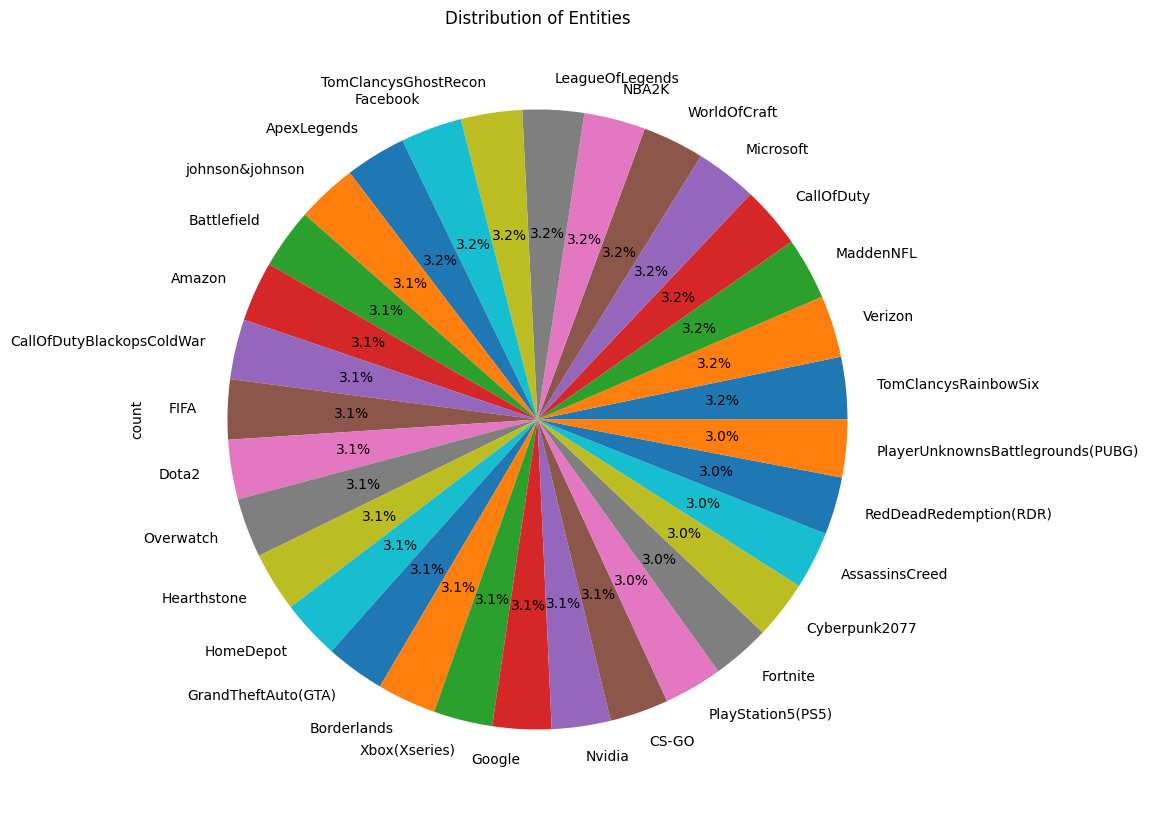

In [10]:
# Data Visualization

entity_content=twitts['Entity'].value_counts()
entity_content.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('Distribution of Entities')
plt.show()

<Axes: xlabel='Sentiment'>

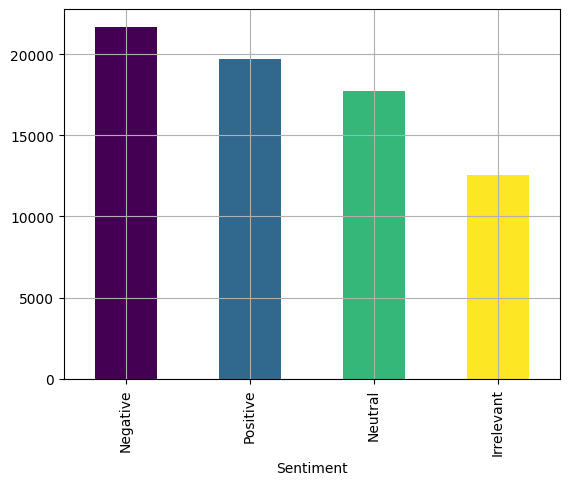

In [11]:
sentiment_content=twitts['Sentiment'].value_counts()
color=plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment_content))]
sentiment_content.plot(kind='bar',color=colors,grid=True)

<Axes: xlabel='Entity'>

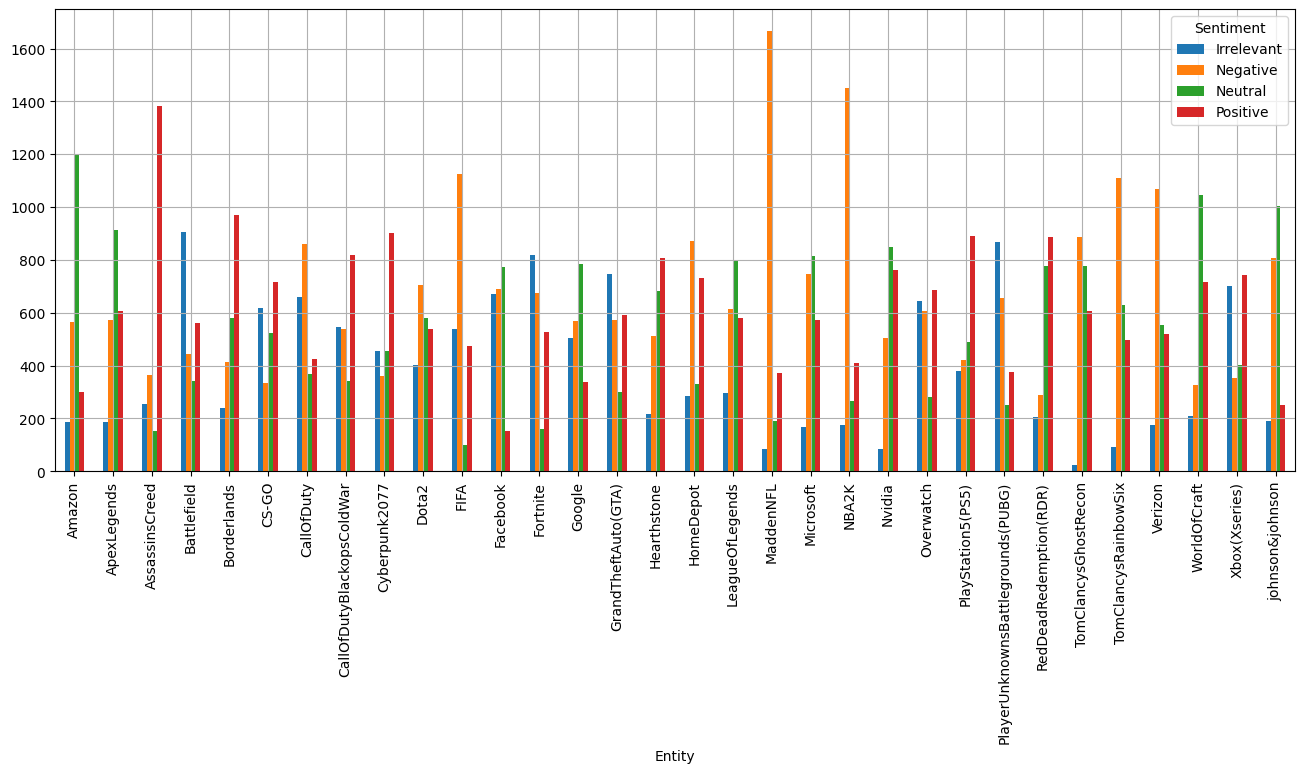

In [12]:
reactions_entities = pd.crosstab(twitts['Entity'],twitts['Sentiment'])
reactions_entities.plot(kind='bar', figsize=(16, 6),grid=True)

In [14]:
##Sentiment Patterns Analysis:

#MaddenNFL had the most negative reactions.
#Battlefield had the most irrelevant feedback.
#Amazon had the most neutral response.
#AssassinsCreed had the most positive reactions.